# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [ ]:
# стандартные импорты
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

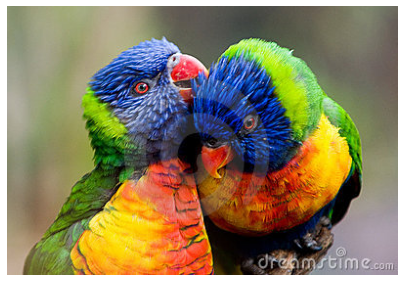

In [ ]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [ ]:
img[0,1,0], img[0,1,1], img[0,1,2]

(115, 149, 139)

In [ ]:
data = img.reshape(275*400, 3)

In [ ]:
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity as ssim

def to_image(y_pred, new_image):
    for i in np.unique(y_pred):
        new_image[np.where(y_pred == i)[0], 0] = np.average(data[np.where(y_pred == i)[0], 0])
        new_image[np.where(y_pred == i)[0], 1] = np.average(data[np.where(y_pred == i)[0], 1])
        new_image[np.where(y_pred == i)[0], 2] = np.average(data[np.where(y_pred == i)[0], 2])
    return new_image.reshape(275, 400, 3)

### KMeans

 n_clusters: 2, SSIM: 0.5332499147592723


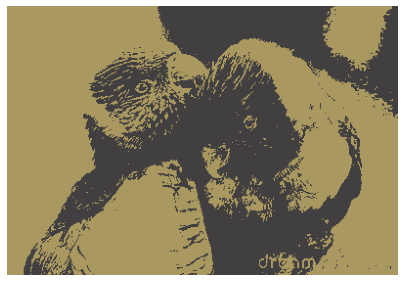

 n_clusters: 3, SSIM: 0.5632683574274916


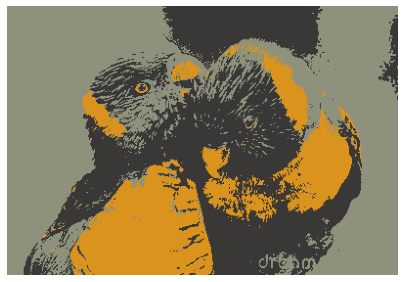

 n_clusters: 10, SSIM: 0.677548092828676


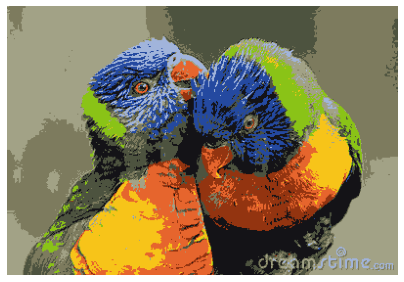

 n_clusters: 20, SSIM: 0.7594997865089467


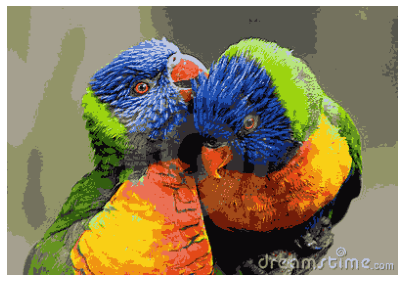

In [ ]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
for k in [2, 3, 10, 20 ]:
    model = KMeans(n_clusters=k, n_jobs = -1)
    y_pred = model.fit_predict(data)
    new_img = to_image(y_pred, data.copy())
    print(f' n_clusters: {k}, SSIM: {ssim(new_img, img, multichannel=True)}')
    draw_picture(new_img)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
np.random.seed(42)
er = []
for i in range(1,6):
    for j in np.arange(0.2, 3, 0.2):
        model = DBSCAN(eps=j, min_samples=i, n_jobs = -1)
        y_pred = model.fit_predict(data)
        new_img = to_image(y_pred, data.copy())
        er.append((ssim(new_img, img, multichannel=True), (i, j)))

In [ ]:
# Лучшие параметры:
print(sorted(er, key = lambda x: x[0])[-1])

(0.5520263709114261, (2, 1.8))


SSIM:  0.6963963733429629


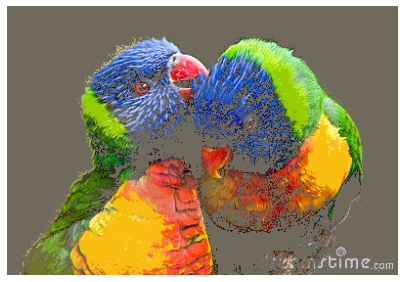

In [ ]:
model = DBSCAN(eps=3, min_samples=1)
y_pred = model.fit_predict(data)
new_img = to_image(y_pred, data.copy())
print('SSIM: ',ssim(new_img, img, multichannel=True))
draw_picture(new_img)

### AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def to_image(y_pred, new_image):
    for i in np.unique(y_pred):
        new_image[np.where(y_pred == i)[0], 0] = np.average(data[np.where(y_pred == i)[0], 0])
        new_image[np.where(y_pred == i)[0], 1] = np.average(data[np.where(y_pred == i)[0], 1])
        new_image[np.where(y_pred == i)[0], 2] = np.average(data[np.where(y_pred == i)[0], 2])
    return new_image.reshape(175, 175, 3)

In [ ]:
import PIL
img = Image.open('birds.jpg')
img1 = img.resize((175, 175), PIL.Image.ANTIALIAS)
img1.save('resized_image.jpg')

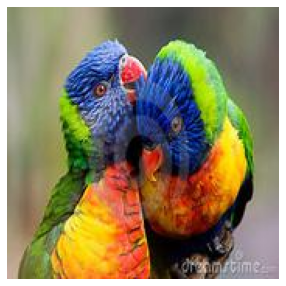

In [ ]:
img = cv2.imread('resized_image.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
data = img.reshape(175*175, 3)

 n_clusters: 2, SSIM: 0.5026199081192736


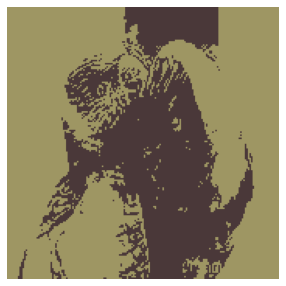

 n_clusters: 3, SSIM: 0.4970320583550376


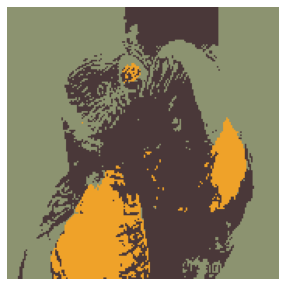

 n_clusters: 10, SSIM: 0.6215508531564309


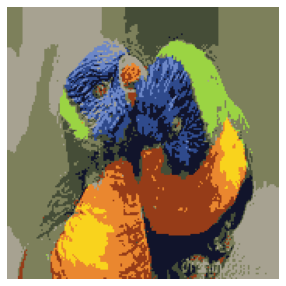

 n_clusters: 20, SSIM: 0.7430233273227639


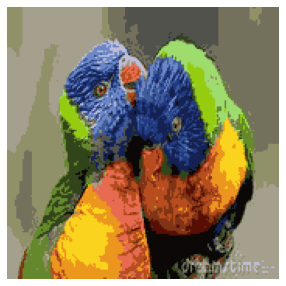

In [ ]:
import warnings
res_data = data.copy()
res_img = img.copy()
warnings.filterwarnings('ignore')
np.random.seed(42)
for k in [2, 3, 10, 20]:
    model = AgglomerativeClustering(n_clusters=k)
    y_pred = model.fit_predict(res_data)
    new_img = to_image(y_pred, res_data.copy())
    print(f' n_clusters: {k}, SSIM: {ssim(new_img, res_img, multichannel=True)}')
    draw_picture(new_img)

### Итог
Лучший скор показал алгоритм KMeans при колличестве кластеров = 20. Результата составил SSIM = 0.759

### Мое изображение

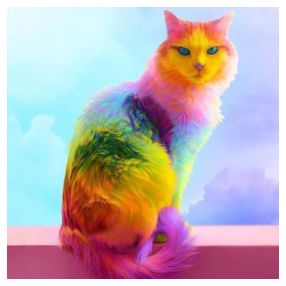

In [ ]:
img = cv2.imread('medium.jpg')
draw_picture(img)

In [ ]:
data = img.reshape(300*300, 3)

In [ ]:
def to_image(y_pred, new_image):
    for i in np.unique(y_pred):
        new_image[np.where(y_pred == i)[0], 0] = np.average(data[np.where(y_pred == i)[0], 0])
        new_image[np.where(y_pred == i)[0], 1] = np.average(data[np.where(y_pred == i)[0], 1])
        new_image[np.where(y_pred == i)[0], 2] = np.average(data[np.where(y_pred == i)[0], 2])
    return new_image.reshape(300, 300, 3)

 n_clusters: 2, SSIM: 0.6323319277005489


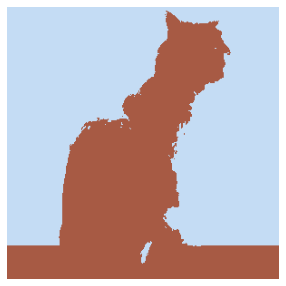

 n_clusters: 3, SSIM: 0.6624608923909084


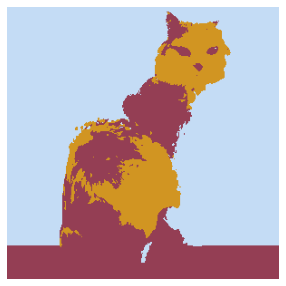

 n_clusters: 10, SSIM: 0.7093498672483621


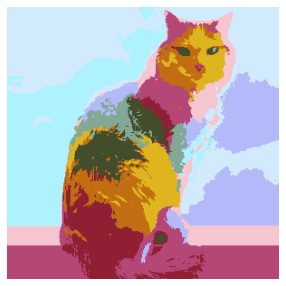

 n_clusters: 20, SSIM: 0.7632095019087181


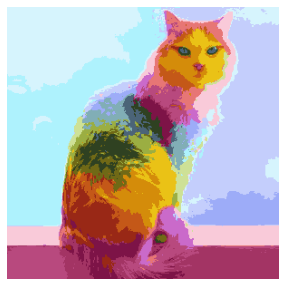

In [ ]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
for k in [2, 3, 10, 20 ]:
    model = KMeans(n_clusters=k, n_jobs = -1)
    y_pred = model.fit_predict(data)
    new_img = to_image(y_pred, data.copy())
    print(f' n_clusters: {k}, SSIM: {ssim(new_img, img, multichannel=True)}')
    draw_picture(new_img)

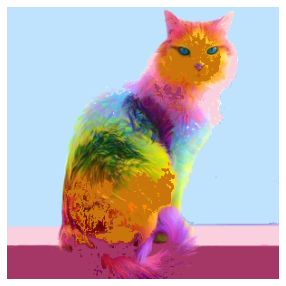

In [ ]:
model = DBSCAN(eps=3, min_samples=1)
y_pred = model.fit_predict(data)
new_img = to_image(y_pred, data.copy())
draw_picture(new_img)

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [ ]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [ ]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [ ]:
y.shape

(2370,)

In [ ]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

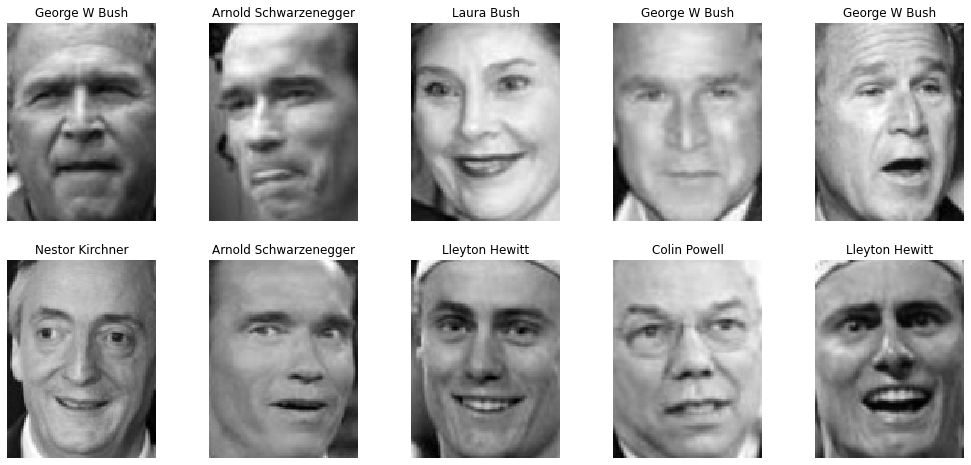

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

#### Запуск без уменьшения размерности данных

In [ ]:
# без уменьшения размерности
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

accuracy: 0.6729957805907173


#### PCA

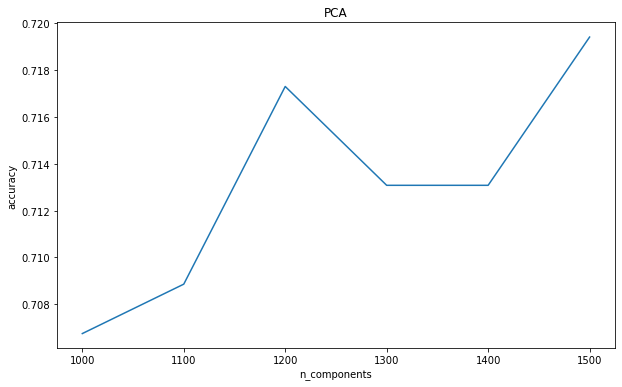

the best accuracy and n_components: (0.7194092827004219, 1500)


In [ ]:
# PCA
from sklearn.decomposition import PCA

ac = []
for i in np.arange(1000, 1501, 100):
    pca = PCA(n_components=i)

    X_pca_train = pca.fit(X_train).transform(X_train)
    X_pca_test = pca.transform(X_test)

    model = LogisticRegression()
    model.fit(X_pca_train, y_train)
    preds = model.predict(X_pca_test)
    ac.append((accuracy_score(y_test, preds), i))
    #print(f'accuracy: {accuracy_score(y_test, preds)}, n_components {i}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000, 1501, 100), list(map(lambda x: x[0], ac)))
plt.title('PCA')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')

#### SVD

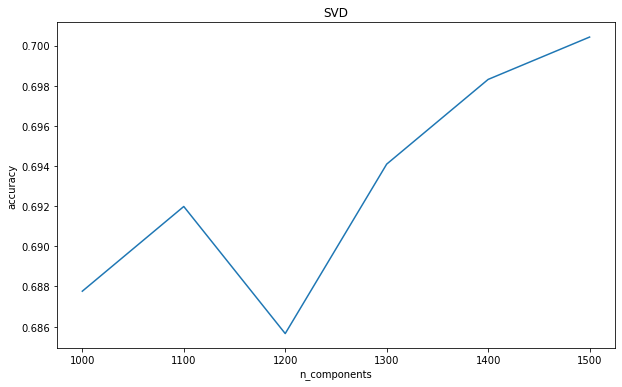

the best accuracy and n_components: (0.70042194092827, 1500)


In [ ]:
# SVD
from sklearn.decomposition import TruncatedSVD

ac = []
for i in np.arange(1000, 1501, 100):
    svd = TruncatedSVD(n_components=i)
    # Применим PCA к нашим векторам с лицами
    X_svd_train = svd.fit_transform(X_train)
    X_svd_test = svd.transform(X_test)

    model = LogisticRegression()
    model.fit(X_svd_train, y_train)
    preds = model.predict(X_svd_test)

    ac.append((accuracy_score(y_test, preds), i))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000, 1501, 100), list(map(lambda x: x[0], ac)))
plt.title('SVD')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')    

TSNE

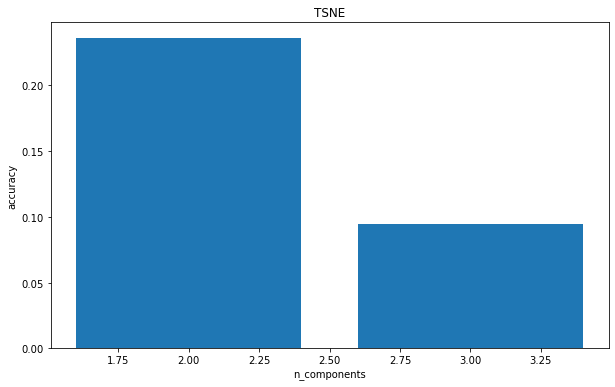

the best accuracy and n_components: (0.23628691983122363, 2)


In [ ]:
# TSNE
from sklearn.manifold import TSNE

ac = []
for i in range(2, 4):
    tsne = TSNE(n_components=i, n_iter=400)

    X_tsne_train = tsne.fit_transform(X_train)
    X_tsne_test = tsne.fit_transform(X_test)

    model = LogisticRegression()
    model.fit(X_tsne_train, y_train)
    preds = model.predict(X_tsne_test)

    ac.append((accuracy_score(y_test, preds), i))

plt.figure(figsize=(10, 6))
#plt.plot(np.arange(2,4), list(map(lambda x: x[0], ac)))
plt.bar(np.arange(2,4), list(map(lambda x: x[0], ac)))
plt.title('TSNE')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')    

#### Все то же самое но для RandomForestClassifier

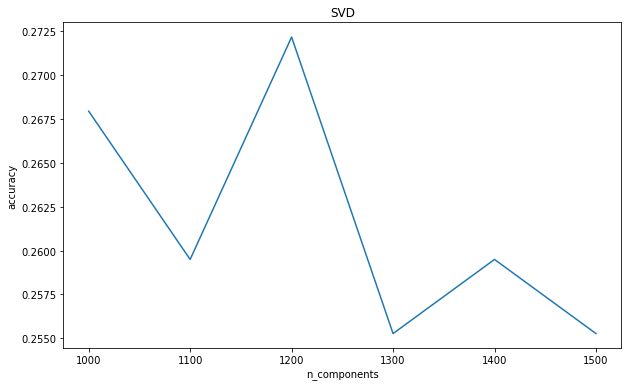

the best accuracy and n_components: (0.2721518987341772, 1200)


In [ ]:
#SVD
from sklearn.ensemble import RandomForestClassifier


ac = []
for i in np.arange(1000, 1501, 100):
    svd = TruncatedSVD(n_components=i)
    # Применим PCA к нашим векторам с лицами
    X_svd_train = svd.fit(X_train).transform(X_train)
    X_svd_test = svd.transform(X_test)

    model = RandomForestClassifier()
    model.fit(X_svd_train, y_train)
    preds = model.predict(X_svd_test)

    ac.append((accuracy_score(y_test, preds), i))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000, 1501, 100), list(map(lambda x: x[0], ac)))
plt.title('SVD')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')   

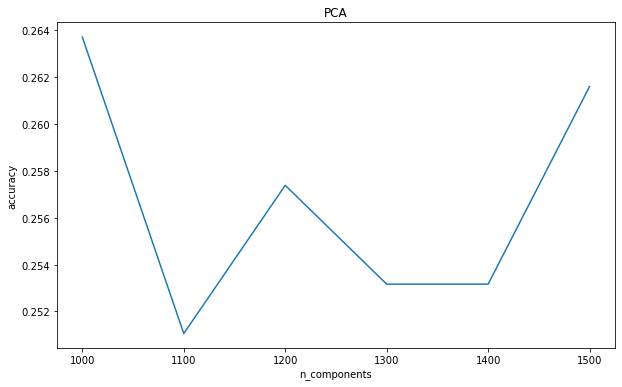

the best accuracy and n_components: (0.26371308016877637, 1000)


In [ ]:
#PCA
ac = []
for i in np.arange(1000, 1501, 100):
    pca = PCA(n_components=i)

    X_pca_train = pca.fit(X_train).transform(X_train)
    X_pca_test = pca.transform(X_test)

    model = RandomForestClassifier()
    model.fit(X_pca_train, y_train)
    preds = model.predict(X_pca_test)
    ac.append((accuracy_score(y_test, preds), i))
    #print(f'accuracy: {accuracy_score(y_test, preds)}, n_components {i}')

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000, 1501, 100), list(map(lambda x: x[0], ac)))
plt.title('PCA')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')

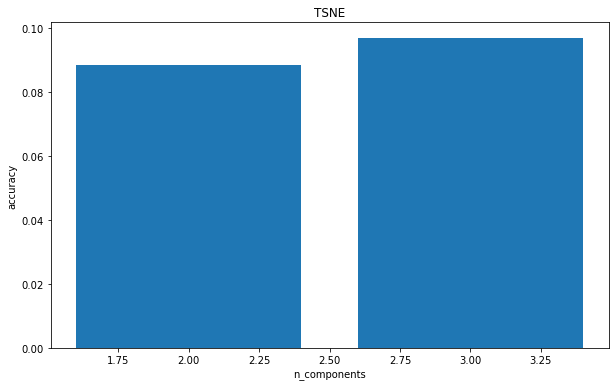

the best accuracy and n_components: (0.0970464135021097, 3)


In [ ]:
#TSNE
ac = []
for i in range(2, 4):
    tsne = TSNE(n_components=i, n_iter=400)

    X_tsne_train = tsne.fit_transform(X_train)
    X_tsne_test = tsne.fit_transform(X_test)

    model = RandomForestClassifier()
    model.fit(X_tsne_train, y_train)
    preds = model.predict(X_tsne_test)

    ac.append((accuracy_score(y_test, preds), i))

plt.figure(figsize=(10, 6))
#plt.plot(np.arange(2,4), list(map(lambda x: x[0], ac)))
plt.bar(np.arange(2,4), list(map(lambda x: x[0], ac)))
plt.title('TSNE')
plt.ylabel('accuracy')
plt.xlabel('n_components')
plt.show()
print(f'the best accuracy and n_components: {sorted(ac, key = lambda x: x[0])[-1]}')    

#### Лучшая конфигурация с лог. регрессией и алгоритмом PCA. Теперь переберу гиперпараметры

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"penalty":["l1","l2"], 'C' : np.logspace(-4, 4, 20)}

model = LogisticRegression()
gs = GridSearchCV(model, parameters, scoring = 'accuracy', verbose = 10, n_jobs = -1)

pca = PCA(n_components=1500)


X_pca_train = pca.fit(X_train).transform(X_train)
X_pca_test = pca.transform(X_test)

gs.fit(X_pca_train, y_train)
preds = gs.predict(X_pca_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

accuracy: 0.7109704641350211


Модель из коробки дает результат лучше

In [ ]:
pca = PCA(n_components=1500)

X_pca_train = pca.fit(X_train).transform(X_train)
X_pca_test = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_pca_train, y_train)
preds = model.predict(X_pca_test)
accuracy_score(y_test, preds)

0.7151898734177216

Я выбрал PCA, так как он показал самый высокий результат по сравнению с другими алгоритмами сжатия (SVD и TSNE).

### Лица, на которых модель ошиблась

In [ ]:
errors = np.where(preds != y_test)[0][:10]
line = []
#супер неэффективный цикл, но не додумался до нормальной функции из нампая
for j in range(10):
    for i in range(len(X)):
        if (X == X_test[errors[j]])[i].all():
            line.append(i)
            break

In [ ]:
line

[1094, 1800, 210, 1836, 1829, 1204, 252, 100, 1539, 881]

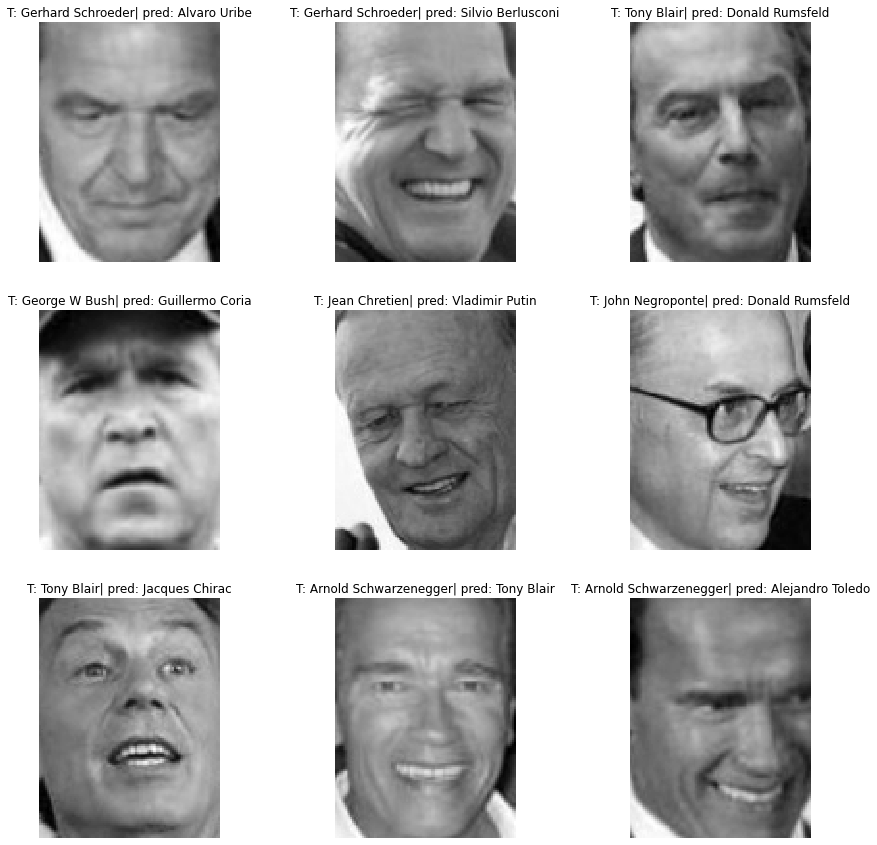

In [ ]:
def plot_image(image_id, line, preds, errors, names):
    # функция рисует изображение номер image_id
    plt.title('T: ' + names[y[image_id]] + '| pred: ' + names[preds[errors[line.index(image_id)]]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols, preds, errors, names):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(15, 15)#17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id, image_ids, preds, errors, names)
        plt.axis('off')

plot_grid(line[:9], nrows=3, ncols=3, preds = preds, errors = errors, names = names)# первые 9 лиц

### Сравним с константным предсказанием самого популярного класса

In [ ]:
import pandas as pd
pd.value_counts(y)

8     530
5     236
31    144
7     121
9     109
3      77
13     71
19     60
15     55
17     53
14     52
28     52
33     49
23     48
10     44
4      42
16     42
22     41
21     41
12     39
0      39
25     37
2      36
1      35
24     33
30     33
29     33
20     32
27     32
32     32
18     31
6      31
26     30
11     30
dtype: int64

In [ ]:
preds = [8]*len(X_test)
accuracy_score(y_test, preds)

0.23839662447257384

Наша модель дает результат гораздо лучше

### Визуализируем PCA, так как он показал лучший скор, значит при сжатии данных ему удается сохранить зависимости лучше

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

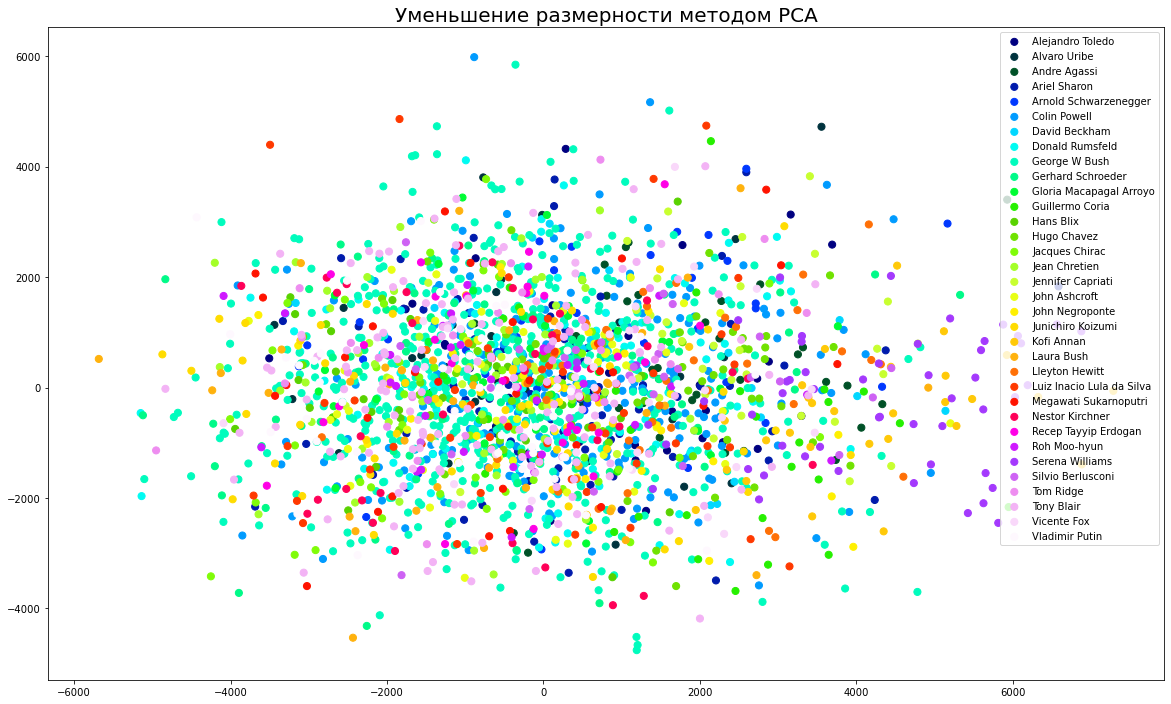

In [ ]:
from matplotlib.colors import Normalize

plt.figure(figsize=(20, 12))
for d in range(34): 
    norm = Normalize(vmin=0, vmax=33) 
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca[:, 0][y == d],
                X_pca[:, 1][y == d],
                c=[color] * len(X_pca[:, 0][y == d]), label=names[d], edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()